In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
from calcSMA import calcSMA
from ewm import exponential_weighted_average
from preprocess import read_trade_data

In [3]:
junk1, junk2, trades = read_trade_data('Bitfinex_BTCEUR_trades_2018_02_02.csv')

In [4]:
trades.head()

,price,amount,sell
date,,,
2018-02-02 02:00:08,7349.60000,0.004568,False
2018-02-02 02:00:09,7354.68045,0.010000,True
2018-02-02 02:00:09,7354.68045,0.004568,True
2018-02-02 02:00:10,7354.60000,0.102395,False
2018-02-02 02:00:26,7343.40750,0.086580,False


In [5]:
trades2 = trades['price'].resample('1T').mean()
trades2.interpolate(inplace = True)
trades2 = trades2.to_frame()
trades2.head()

,price
date,
2018-02-02 02:00:00,7351.364330
2018-02-02 02:01:00,7346.674273
2018-02-02 02:02:00,7341.799657
2018-02-02 02:03:00,7338.249829
2018-02-02 02:04:00,7334.700000


In [6]:
for i in [10,30,60]:
    calcSMA(trades2, trades2['price'], i)
    exponential_weighted_average(trades2, trades2['SMA-%s'%i], trades2['price'], i)

In [7]:
trades2.tail(10)

,price,SMA-10,EWM-10,SMA-30,EWM-30,SMA-60,EWM-60
date,,,,,,,
2018-02-03 01:50:00,7092.294011,7103.880518,7088.100941,7140.523299,7090.934841,7125.355102,7091.619040
2018-02-03 01:51:00,7077.681979,7100.767062,7075.598187,7139.099766,7076.798455,7125.923336,7077.217411
2018-02-03 01:52:00,7106.378815,7096.063455,7112.534941,7136.432623,7108.350839,7126.342080,7107.350862
2018-02-03 01:53:00,7135.075652,7093.954774,7139.583794,7134.612389,7136.857306,7127.228312,7135.999811
2018-02-03 01:54:00,7149.653155,7096.424752,7151.667028,7133.094911,7150.506212,7128.582032,7150.108267
2018-02-03 01:55:00,7153.457237,7102.061456,7153.815279,7132.673783,7153.653972,7130.167918,7153.568869
2018-02-03 01:56:00,7139.008226,7111.721466,7136.046815,7132.411037,7138.031843,7131.569819,7138.522871
2018-02-03 01:57:00,7123.637783,7117.750622,7121.155977,7131.698237,7122.678179,7132.709576,7123.141614
2018-02-03 01:58:00,7139.363636,7119.757257,7143.005168,7130.396163,7140.476000,7133.571830,7139.904370


/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


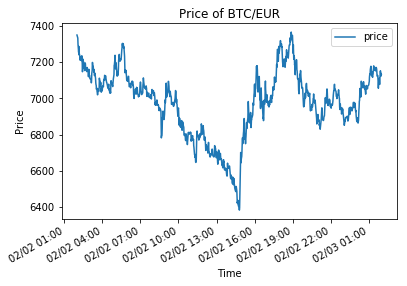

In [11]:
plt.figure(1)
plt.plot(trades2.index.values, trades2['price'])
myFmt = mdates.DateFormatter('%m/%d %H:%M');
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Price of BTC/EUR')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


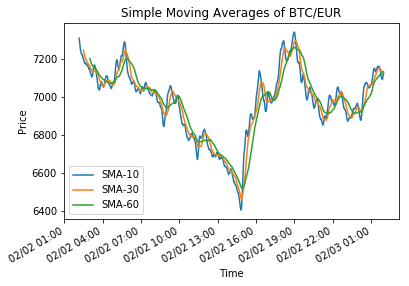

In [12]:
plt.figure(2)
for i in [10, 30, 60]:
    plt.plot(trades2.index.values, trades2['SMA-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Simple Moving Averages of BTC/EUR')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


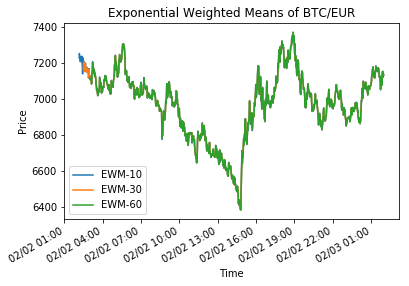

In [13]:
plt.figure(2)
for i in [10, 30, 60]:
    plt.plot(trades2.index.values, trades2['EWM-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Exponential Weighted Means of BTC/EUR')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()